### 2023s년 아파트 거래 자료 - 실습

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data0225/trade_apt_api_2023_address0225.txt', sep='\t')
df.head() # 파라미터를 생략해도 기본이 5행으로 적용

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,지번,층
0,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),"138,000",2023,6,9,2008,95.880,9,9
1,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),"170,000",2023,6,10,2008,146.920,9,8
2,202306,종로구,11110,사직동,사직아파트,"84,000",2023,6,12,1970,116.230,1-8,6
3,202306,종로구,11110,당주동,롯데미도파광화문빌딩,"93,000",2023,6,20,1981,149.950,145,9
4,202306,종로구,11110,신문로2가,디팰리스,"408,000",2023,6,24,2020,148.111,171,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2302 non-null   int64  
 1   지역명     2302 non-null   object 
 2   지역코드    2302 non-null   int64  
 3   법정동     2302 non-null   object 
 4   아파트     2302 non-null   object 
 5   거래금액    2302 non-null   object 
 6   년       2302 non-null   int64  
 7   월       2302 non-null   int64  
 8   일       2302 non-null   int64  
 9   건축년도    2302 non-null   int64  
 10  전용면적    2302 non-null   float64
 11  지번      2302 non-null   object 
 12  층       2302 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 233.9+ KB


In [4]:
df.describe()


,기준년월,지역코드,년,월,일,건축년도,전용면적,층
count,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,202261.738923,11607.697654,2022.571242,4.614683,16.168115,2001.136838,81.173045,9.668983
std,48.717547,189.737573,0.495006,2.474663,8.576874,12.163308,46.020959,7.153552
min,202201.000000,11110.000000,2022.000000,1.000000,1.000000,1966.000000,12.010000,-1.000000
25%,202206.000000,11680.000000,2022.000000,3.000000,9.000000,1992.000000,49.460475,5.000000
50%,202302.000000,11680.000000,2023.000000,4.000000,16.000000,2003.000000,80.130000,8.000000
75%,202304.000000,11680.000000,2023.000000,6.000000,23.000000,2011.000000,101.988550,13.000000
max,202306.000000,11680.000000,2023.000000,12.000000,31.000000,2023.000000,301.470000,64.000000


In [5]:
df["거래금액"]

0            138,000
1            170,000
2             84,000
3             93,000
4            408,000
            ...     
2297          50,000
2298         220,000
2299          37,400
2300         281,000
2301         420,000
Name: 거래금액, Length: 2302, dtype: object

거래금액에 콤마가 들어 있으면 계산시 문제 발생

In [6]:
price = "135,000".replace(",","")
price

'135000'

In [7]:
print(type(price))

<class 'str'>


In [8]:
iprice = int(price)
print(type(iprice))

<class 'int'>


In [9]:
df["거래금액"] = df["거래금액"].str.replace(",", "").astype(int)

In [10]:
print(type(df["거래금액"]))

<class 'pandas.core.series.Series'>


9번 블로겡서 콤마 제거하고 astype으로 형전환을 한 결과 다시 담는다.    
현재 생성된 데이터 프레임에 수정된 결과를 반영한다.

In [11]:
df

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,지번,층
0,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),138000,2023,6,9,2008,95.880,9,9
1,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),170000,2023,6,10,2008,146.920,9,8
2,202306,종로구,11110,사직동,사직아파트,84000,2023,6,12,1970,116.230,1-8,6
3,202306,종로구,11110,당주동,롯데미도파광화문빌딩,93000,2023,6,20,1981,149.950,145,9
4,202306,종로구,11110,신문로2가,디팰리스,408000,2023,6,24,2020,148.111,171,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,202201,강남구,11680,도곡동,현대비젼21,50000,2022,1,14,1999,35.480,467-19,20
2298,202201,강남구,11680,도곡동,삼성,220000,2022,1,15,1994,84.910,161,5
2299,202201,강남구,11680,도곡동,SK허브프리모,37400,2022,1,18,2006,33.800,953-1,8
2300,202201,강남구,11680,도곡동,한신(개포),281000,2022,1,23,1985,83.860,464,5


In [12]:
df.shape

(2302, 13)

In [13]:
df_cnt = df.groupby("기준년월").count()["거래금액"]
df_cnt

기준년월
202201     76
202202     85
202203    114
202204    139
202205    136
202206     84
202207     70
202208    113
202209     48
202210     35
202211     38
202212     49
202301    113
202302    214
202303    211
202304    216
202305    291
202306    270
Name: 거래금액, dtype: int64

In [16]:
print(type(df_cnt))

<class 'pandas.core.series.Series'>


In [ ]:
x1 = df_cnt.values
x1

array([ 76,  85, 114, 139, 136,  84,  70, 113,  48,  35,  38,  49, 113,
       214, 211, 216, 291, 270])

기본 차트 그려보기
np.arange(len(df_cnt.index)): 0에서 len(df_cnt.index)-1 사이의 값 배열 생성합니다.    
이 값으로 x축의 눈금 위치를 생성합니다.   

1. x축 눈금 및 레이블 설정
2. x축 눈금 레이블 회전
3. 데이터 플롯팅
4. 출력하기

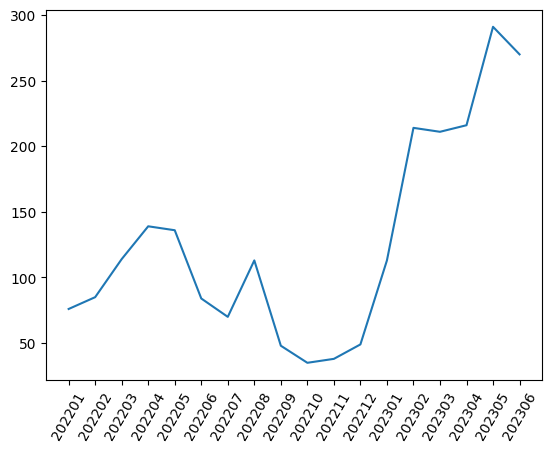

In [26]:
import matplotlib.pyplot as plt
import numpy as np
plt.xticks(np.arange(len(df_cnt)), labels=df_cnt.index)
plt.tick_params(axis='x', labelrotation=60)
plt.plot(x1) # x1에 저장된 데이터를 선 그래프로 그린다.
plt.show() # 그래프를 화면에 출력하는 역할

거래금액에 대한 기준년월별 평균 거래 금액을 출력하시오.

In [ ]:
df